In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

# Print last updated
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# Print versions of libraries we're using (as long as yours are equal or greater than these, your code should work)
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
#print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2024-12-24 14:03:58.664462

NumPy version: 1.26.4
pandas version: 2.2.3
Scikit-Learn version: 1.5.2


In [3]:
df=pd.read_csv("updated_pollution_dataset.csv")
df.shape

(5000, 10)

In [4]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Levels
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [5]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Levels'],
      dtype='object')

In [6]:
df.Levels.value_counts()

Levels
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

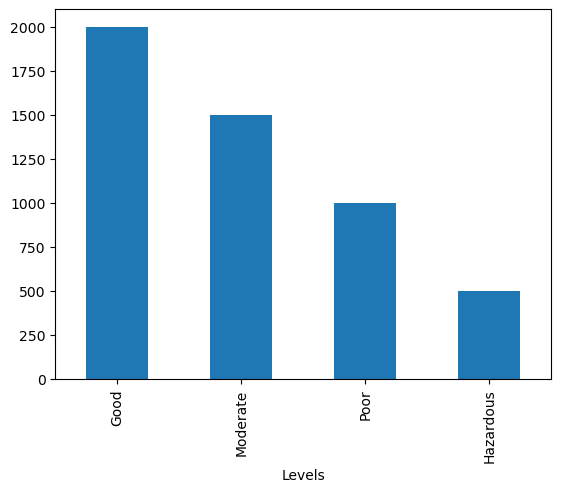

In [7]:
df.Levels.value_counts().plot(kind="bar");

In [8]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [9]:
air_quality_map = {
    'Hazardous' : 0,
    'Poor' : 1,
    'Moderate': 2,
    'Good' : 3
}
df['Levels'] = df['Levels'].map(air_quality_map)

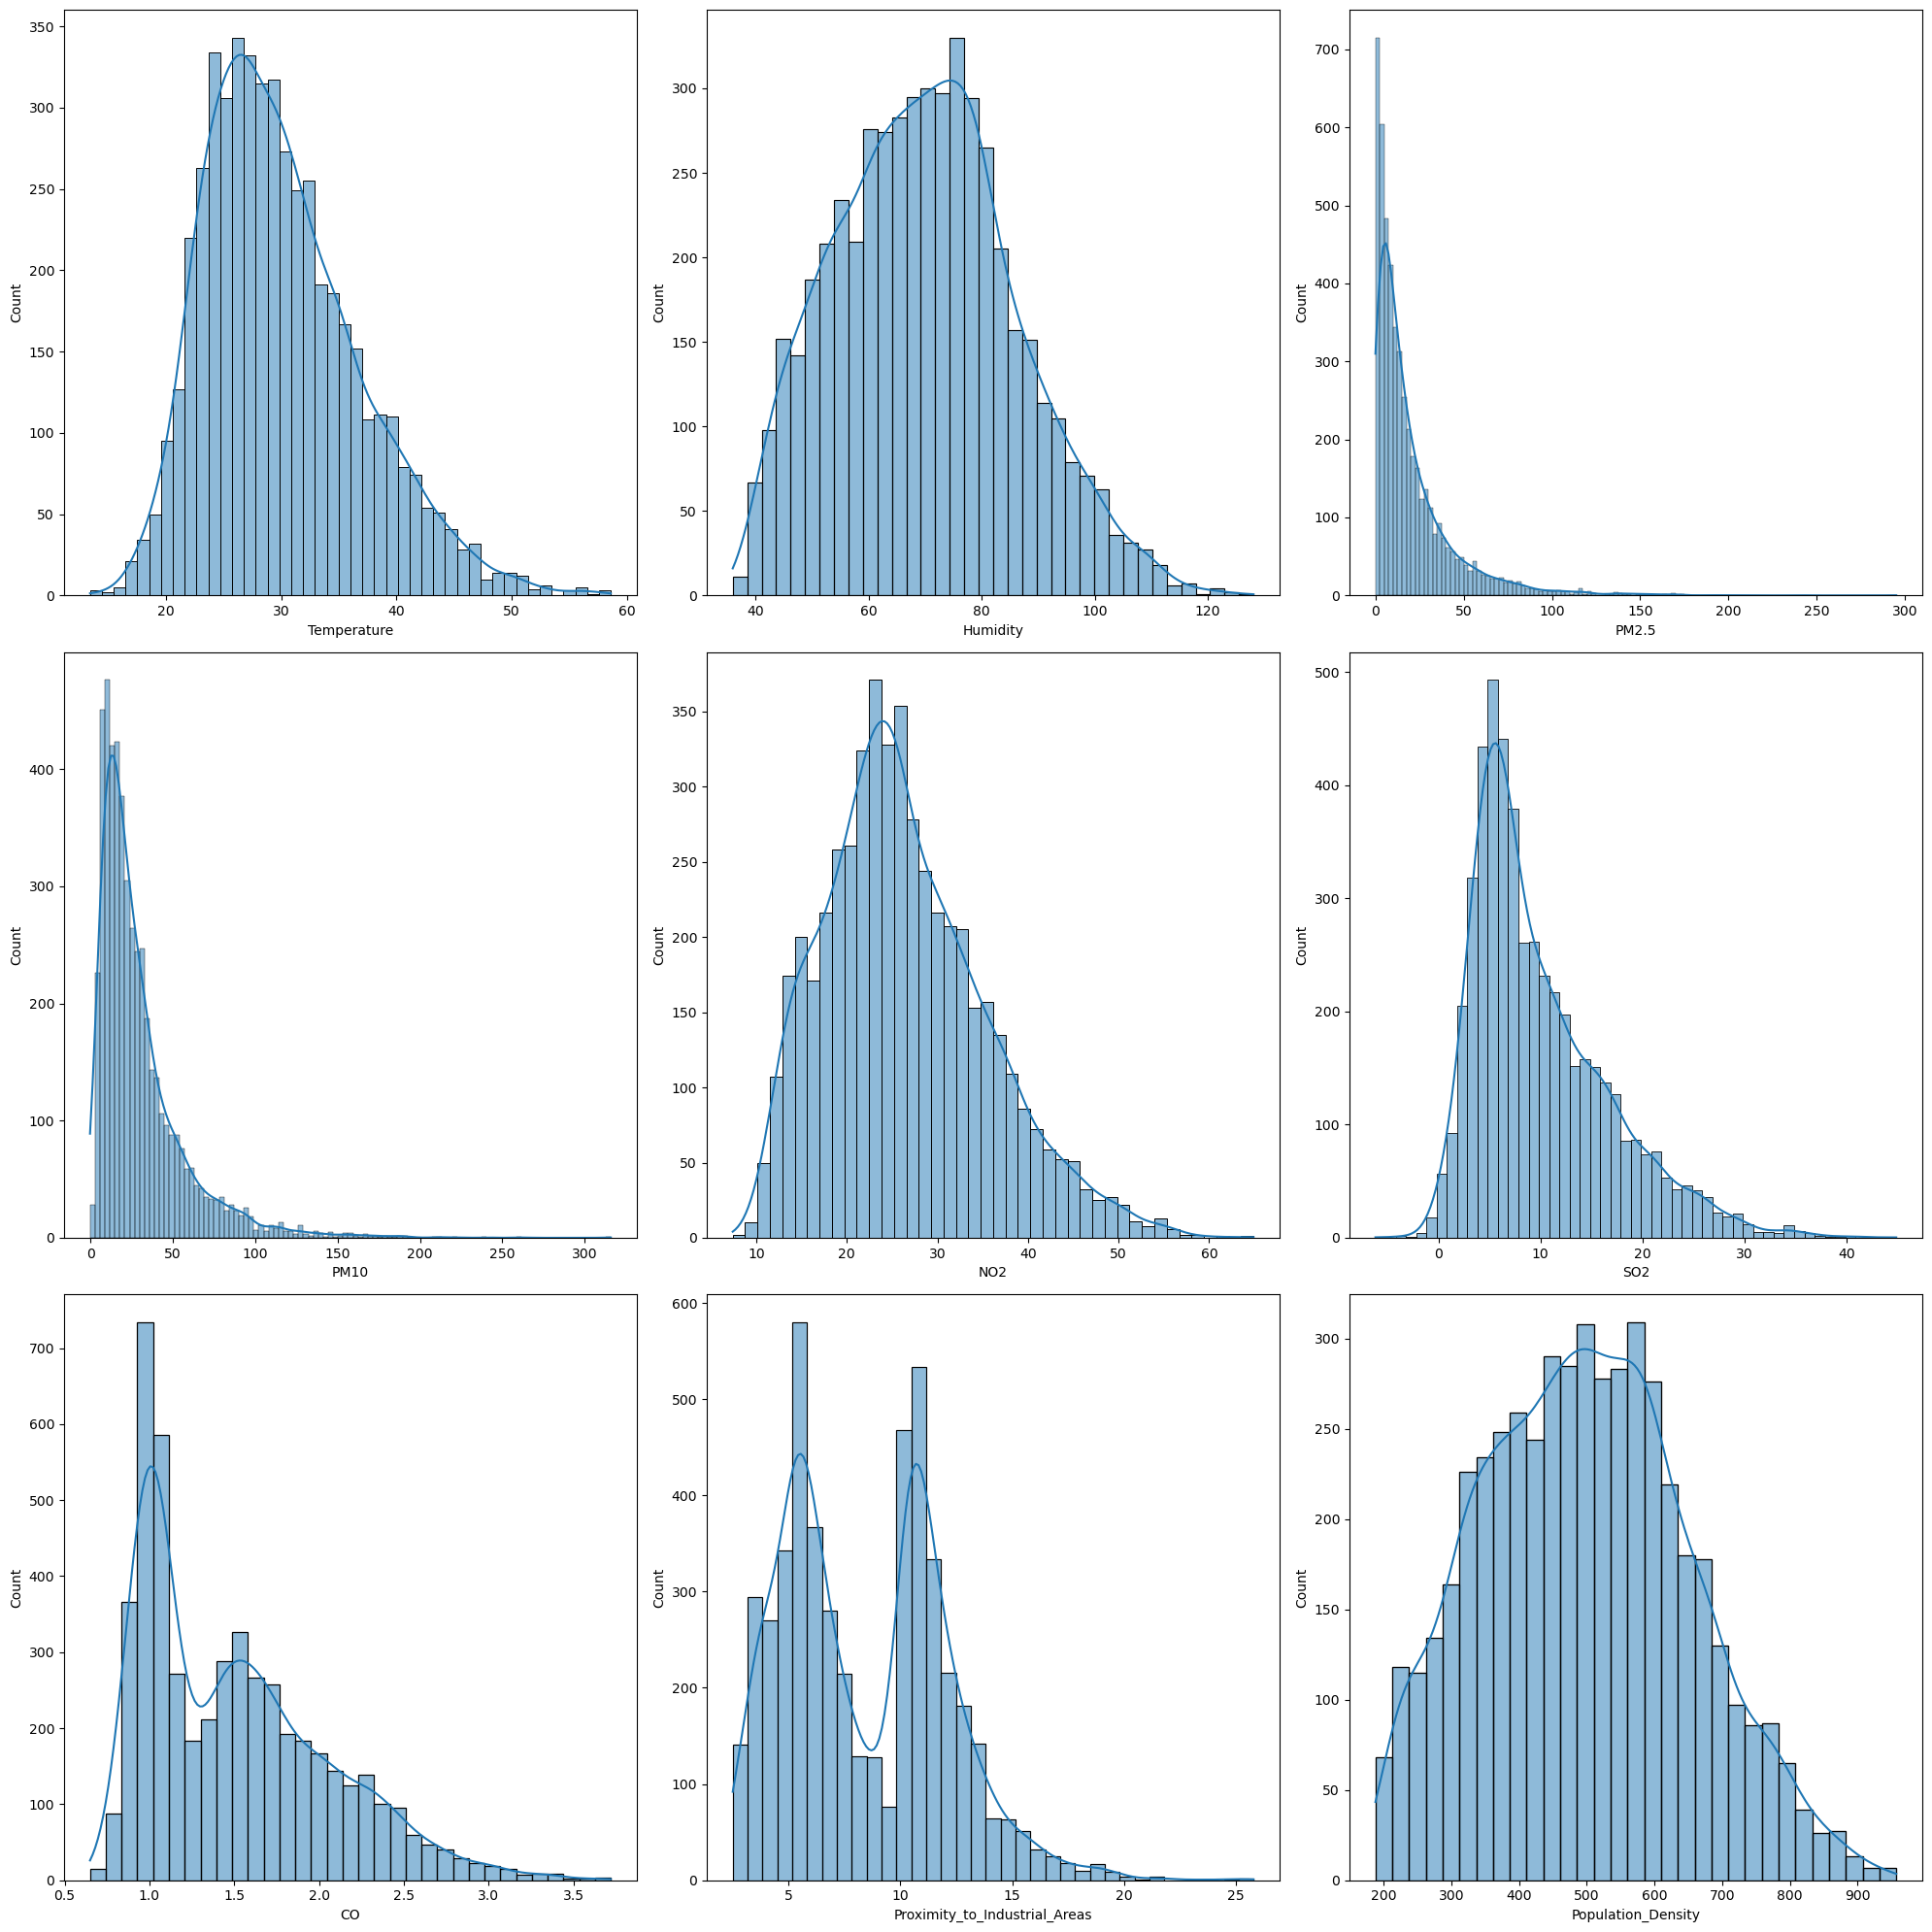

In [10]:
fig,ax=plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
i=0

for col in df.columns:
    if(col!='Levels'):
        sns.histplot(data=df,x=col,kde=True,ax=ax[i])
        i+=1
plt.tight_layout()

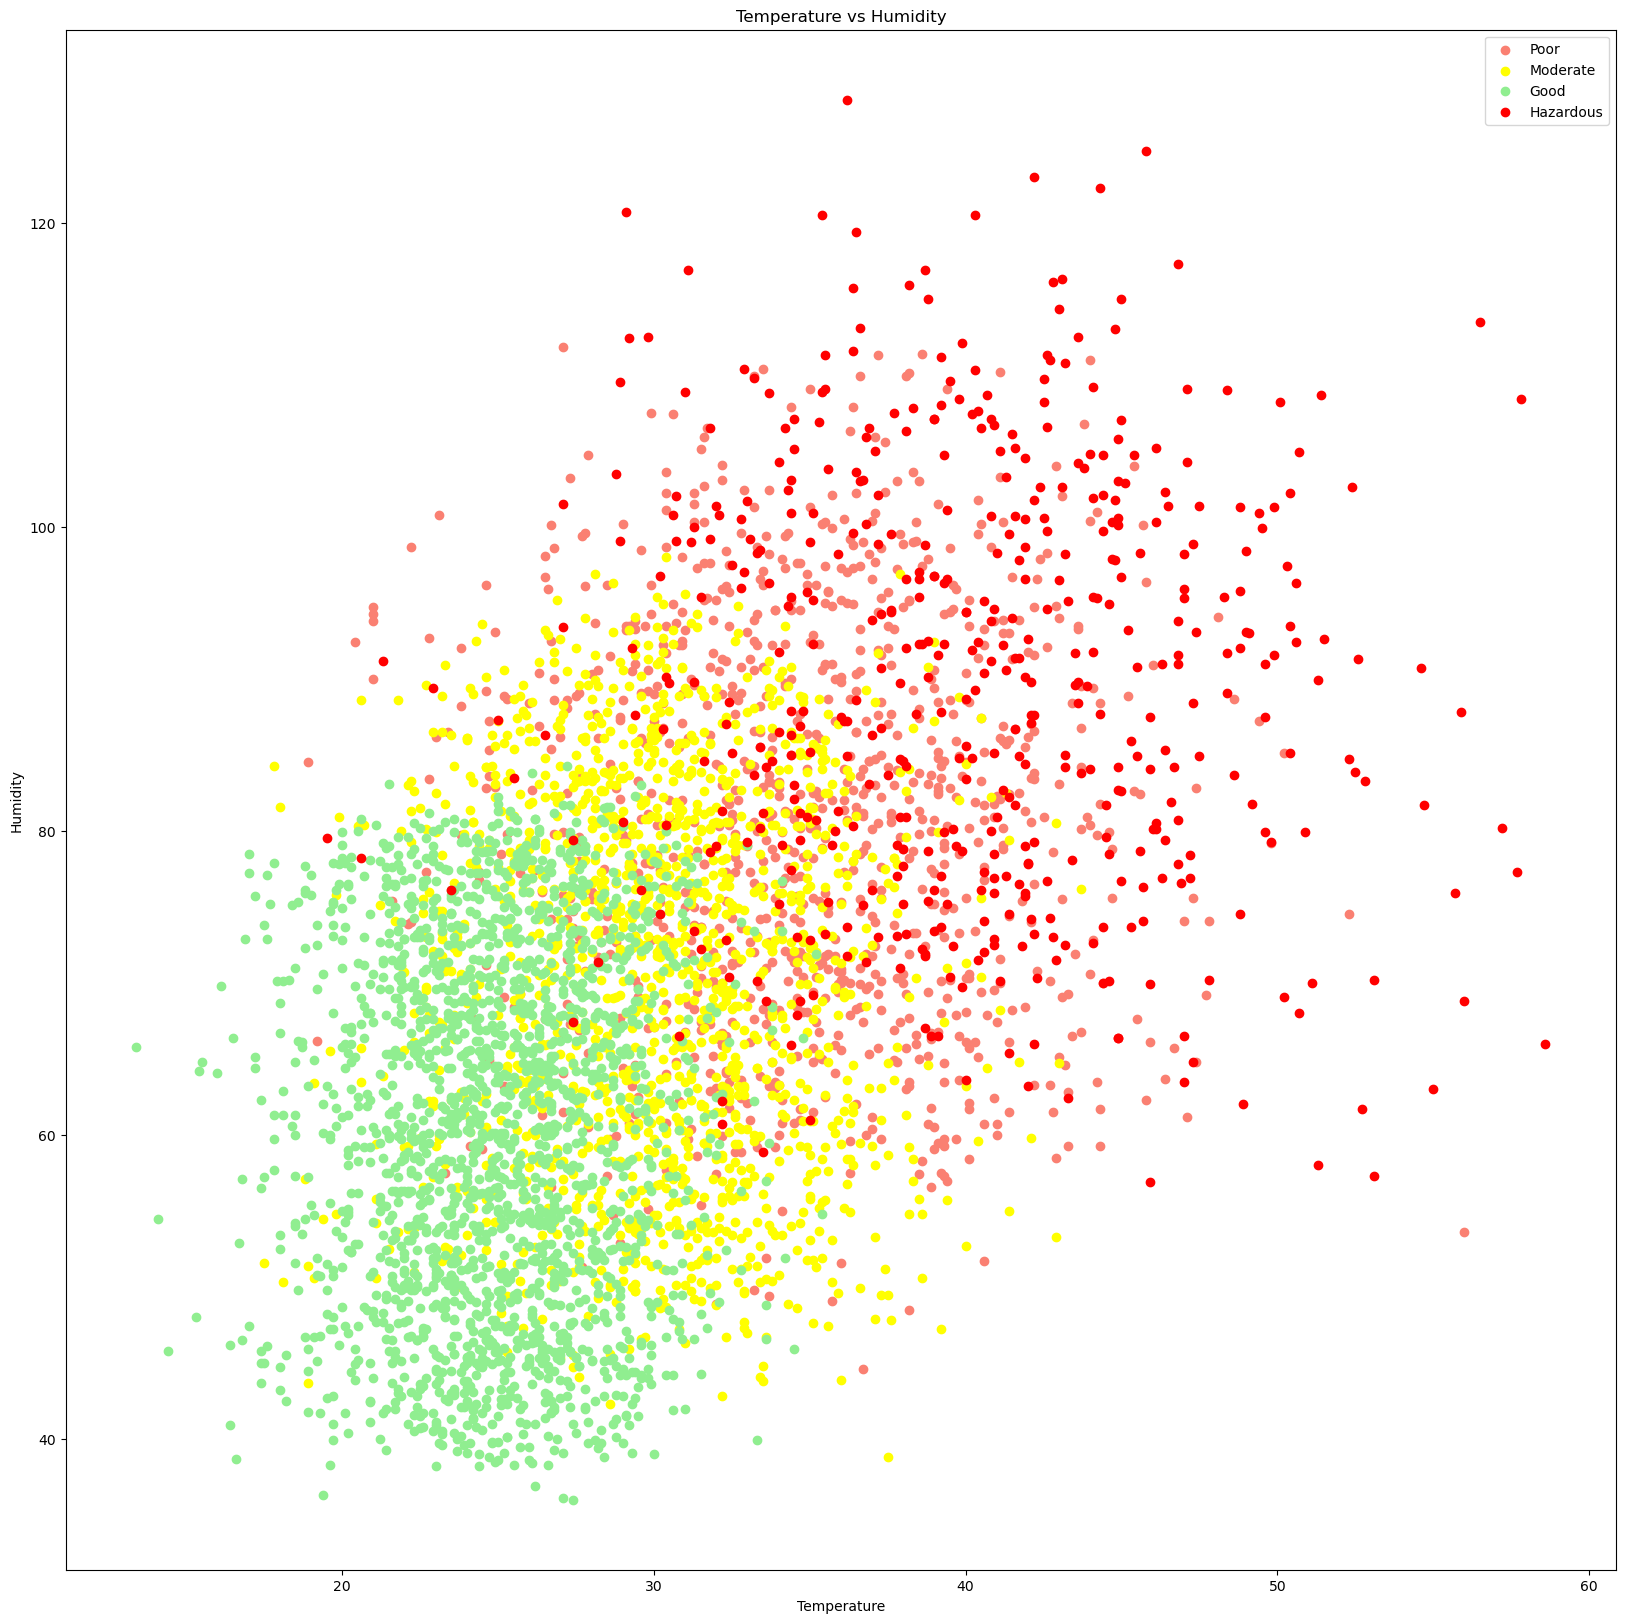

In [11]:
plt.figure(figsize=(20,20))


plt.scatter(df.Temperature[df.Levels==1], 
            df.Humidity[df.Levels==1], 
            c="salmon") # define it as a scatter figure

plt.scatter(df.Temperature[df.Levels==2], 
            df.Humidity[df.Levels==2], 
            c="yellow")
plt.scatter(df.Temperature[df.Levels==3], 
            df.Humidity[df.Levels==3], 
            c="lightgreen")

plt.scatter(df.Temperature[df.Levels==0], 
            df.Humidity[df.Levels==0], 
            c="red") # axis always come as (x, y)


plt.title("Temperature vs Humidity")
plt.xlabel("Temperature")
plt.legend(["Poor", "Moderate","Good","Hazardous"])
plt.ylabel("Humidity");


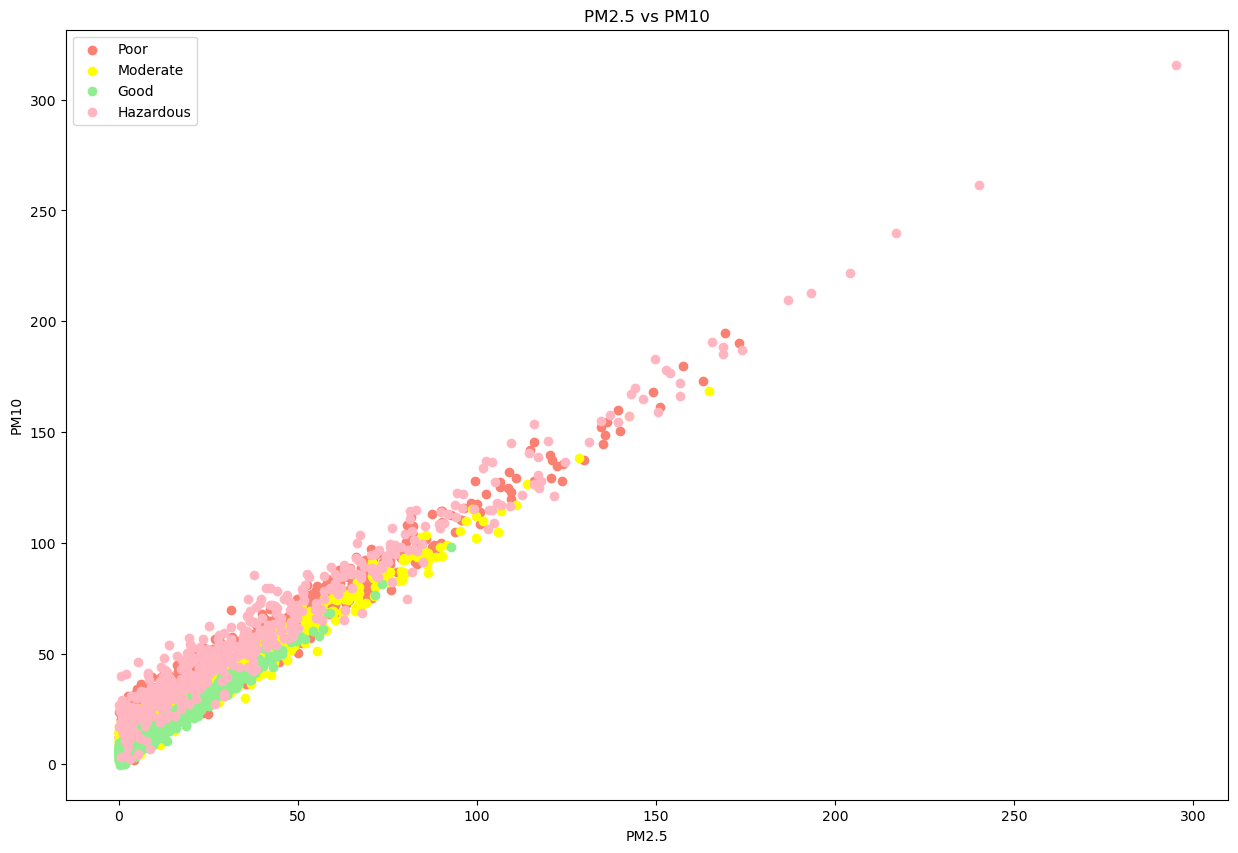

In [12]:
plt.figure(figsize=(15,10))

plt.scatter(df['PM2.5'][df['Levels'] == 1], 
            df['PM10'][df['Levels'] == 1], 
            c="salmon")
plt.scatter(df['PM2.5'][df['Levels'] == 2], 
            df['PM10'][df['Levels'] == 2], 
            c="yellow")
plt.scatter(df['PM2.5'][df['Levels'] == 3], 
            df['PM10'][df['Levels'] == 3], 
            c="lightgreen")

plt.scatter(df['PM2.5'][df['Levels'] == 0], 
            df['PM10'][df['Levels'] == 0], 
            c="lightpink")



plt.title("PM2.5 vs PM10")
plt.xlabel("PM2.5")
plt.legend(["Poor", "Moderate","Good","Hazardous"])
plt.ylabel("PM10");


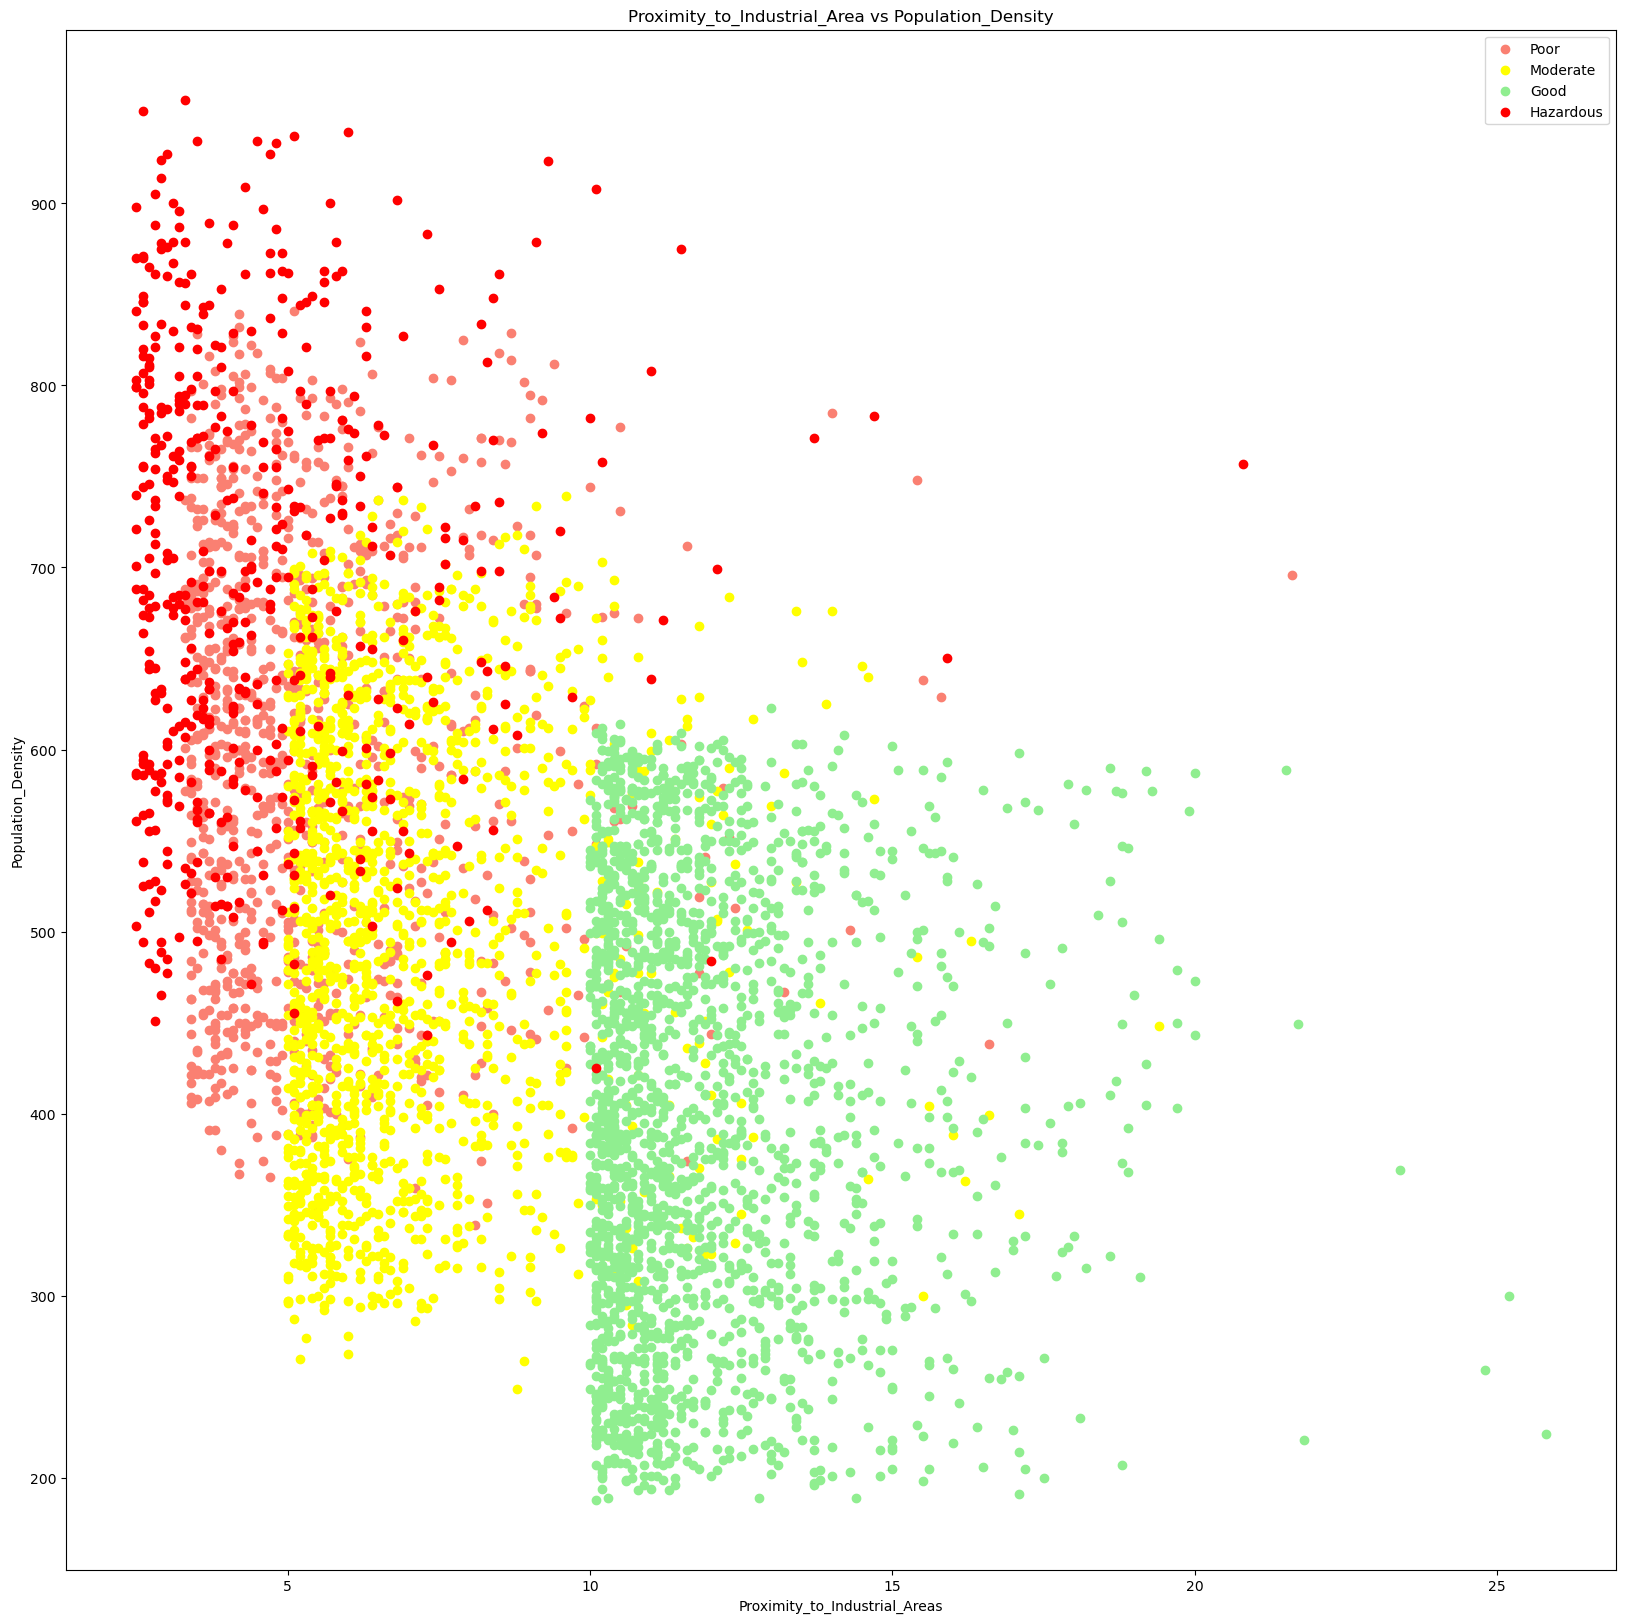

In [13]:
plt.figure(figsize=(20,20))


plt.scatter(df.Proximity_to_Industrial_Areas[df.Levels==1], 
            df.Population_Density[df.Levels==1], 
            c="salmon") # define it as a scatter figure

plt.scatter(df.Proximity_to_Industrial_Areas[df.Levels==2], 
            df.Population_Density[df.Levels==2], 
            c="yellow")
plt.scatter(df.Proximity_to_Industrial_Areas[df.Levels==3], 
            df.Population_Density[df.Levels==3], 
            c="lightgreen")

plt.scatter(df.Proximity_to_Industrial_Areas[df.Levels==0], 
            df.Population_Density[df.Levels==0], 
            c="red") # axis always come as (x, y)


plt.title("Proximity_to_Industrial_Area vs Population_Density")
plt.xlabel("Proximity_to_Industrial_Areas")
plt.legend(["Poor", "Moderate","Good","Hazardous"])
plt.ylabel("Population_Density");

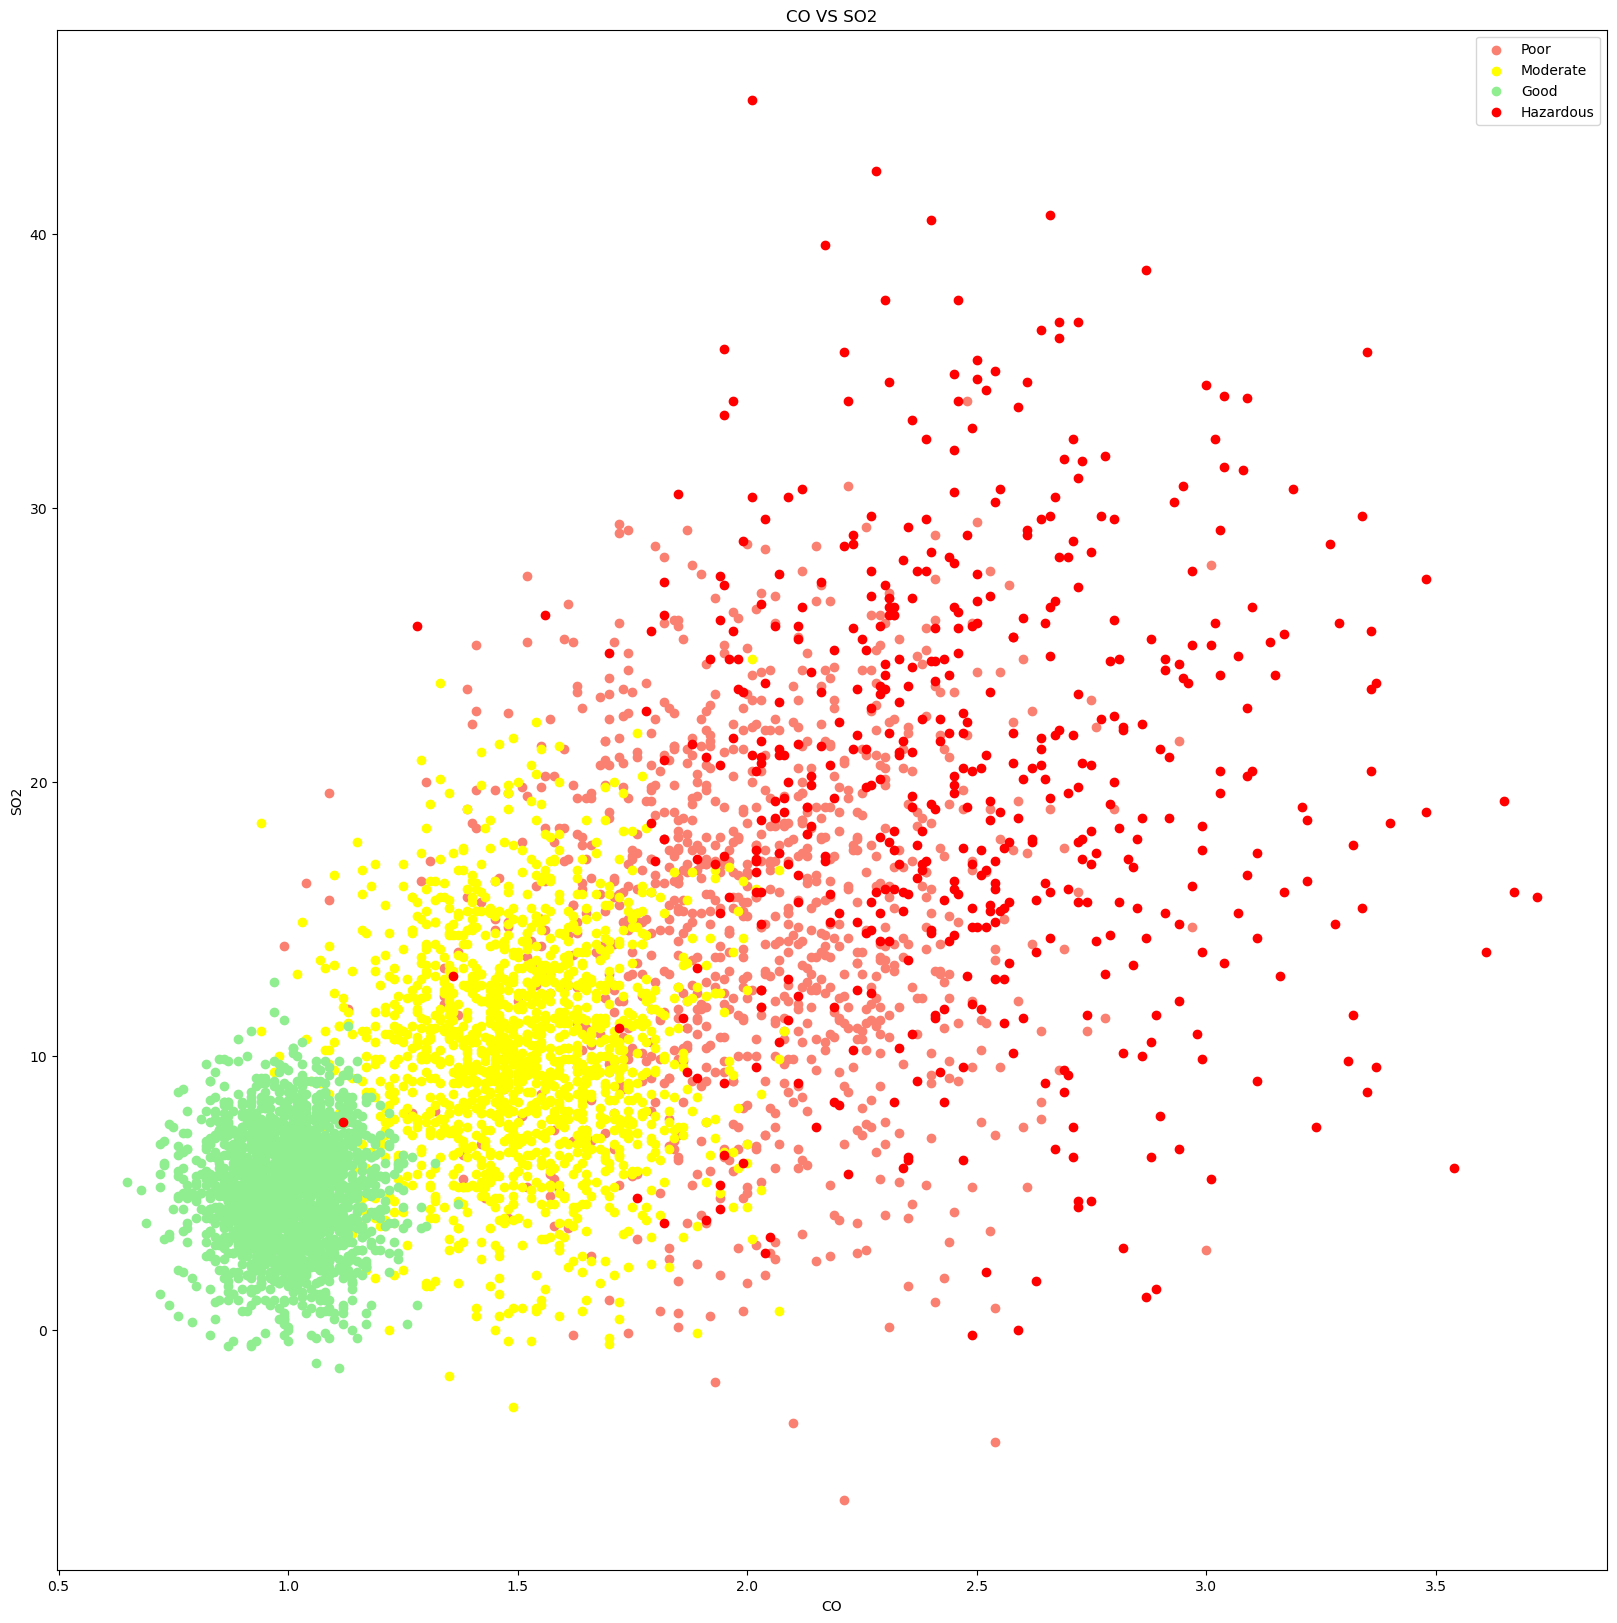

In [14]:
plt.figure(figsize=(20,20))


plt.scatter(df.CO[df.Levels==1], 
            df.SO2[df.Levels==1], 
            c="salmon") # define it as a scatter figure

plt.scatter(df.CO[df.Levels==2], 
            df.SO2[df.Levels==2], 
            c="yellow")
plt.scatter(df.CO[df.Levels==3], 
            df.SO2[df.Levels==3], 
            c="lightgreen")

plt.scatter(df.CO[df.Levels==0], 
            df.SO2[df.Levels==0], 
            c="red") # axis always come as (x, y)


plt.title("CO VS SO2")
plt.xlabel("CO")
plt.legend(["Poor", "Moderate","Good","Hazardous"])
plt.ylabel("SO2");

In [15]:
pd.crosstab(index=df.CO, columns=df.Levels)

Levels,0,1,2,3
CO,,,,
0.65,0,0,0,1
0.68,0,0,0,1
0.69,0,0,0,1
0.72,0,0,0,4
0.73,0,0,0,4
...,...,...,...,...
3.54,1,0,0,0
3.61,1,0,0,0
3.65,1,0,0,0


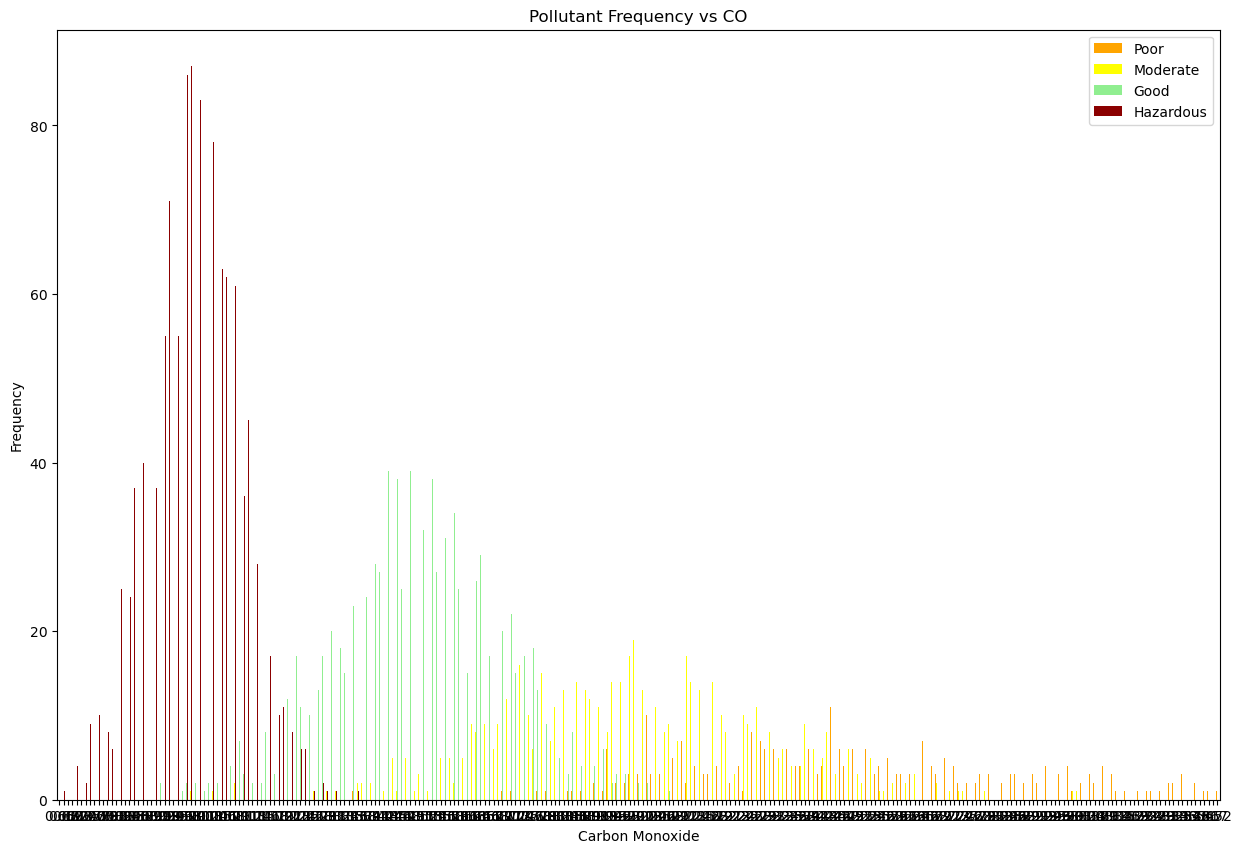

In [16]:
pd.crosstab(df.CO, df.Levels).plot(kind="bar", 
                                   figsize=(15,10), 
                                   color=["orange", "yellow","lightgreen","darkred"])


plt.title("Pollutant Frequency vs CO")
plt.xlabel("Carbon Monoxide")
plt.ylabel("Frequency")
plt.legend(["Poor", "Moderate","Good","Hazardous"])
plt.xticks(rotation = 0);

In [17]:
cor_matrix=df.corr()
cor_matrix

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Levels
Temperature,1.000000,0.466456,0.323840,0.425690,0.591969,0.568082,0.685258,-0.589564,0.481692,-0.753567
Humidity,0.466456,1.000000,0.273366,0.359156,0.491977,0.459804,0.567540,-0.479646,0.411630,-0.625546
PM2.5,0.323840,0.273366,1.000000,0.973005,0.333004,0.299582,0.395179,-0.315766,0.278957,-0.418171
PM10,0.425690,0.359156,0.973005,1.000000,0.439916,0.401849,0.518895,-0.425018,0.365734,-0.555691
NO2,0.591969,0.491977,0.333004,0.439916,1.000000,0.571839,0.710792,-0.607710,0.510938,-0.785030
SO2,0.568082,0.459804,0.299582,0.401849,0.571839,1.000000,0.679060,-0.570385,0.475242,-0.740201
CO,0.685258,0.567540,0.395179,0.518895,0.710792,0.679060,1.000000,-0.707581,0.593389,-0.912534
Proximity_to_Industrial_Areas,-0.589564,-0.479646,-0.315766,-0.425018,-0.607710,-0.570385,-0.707581,1.000000,-0.498058,0.773637
Population_Density,0.481692,0.411630,0.278957,0.365734,0.510938,0.475242,0.593389,-0.498058,1.000000,-0.645546
Levels,-0.753567,-0.625546,-0.418171,-0.555691,-0.785030,-0.740201,-0.912534,0.773637,-0.645546,1.000000


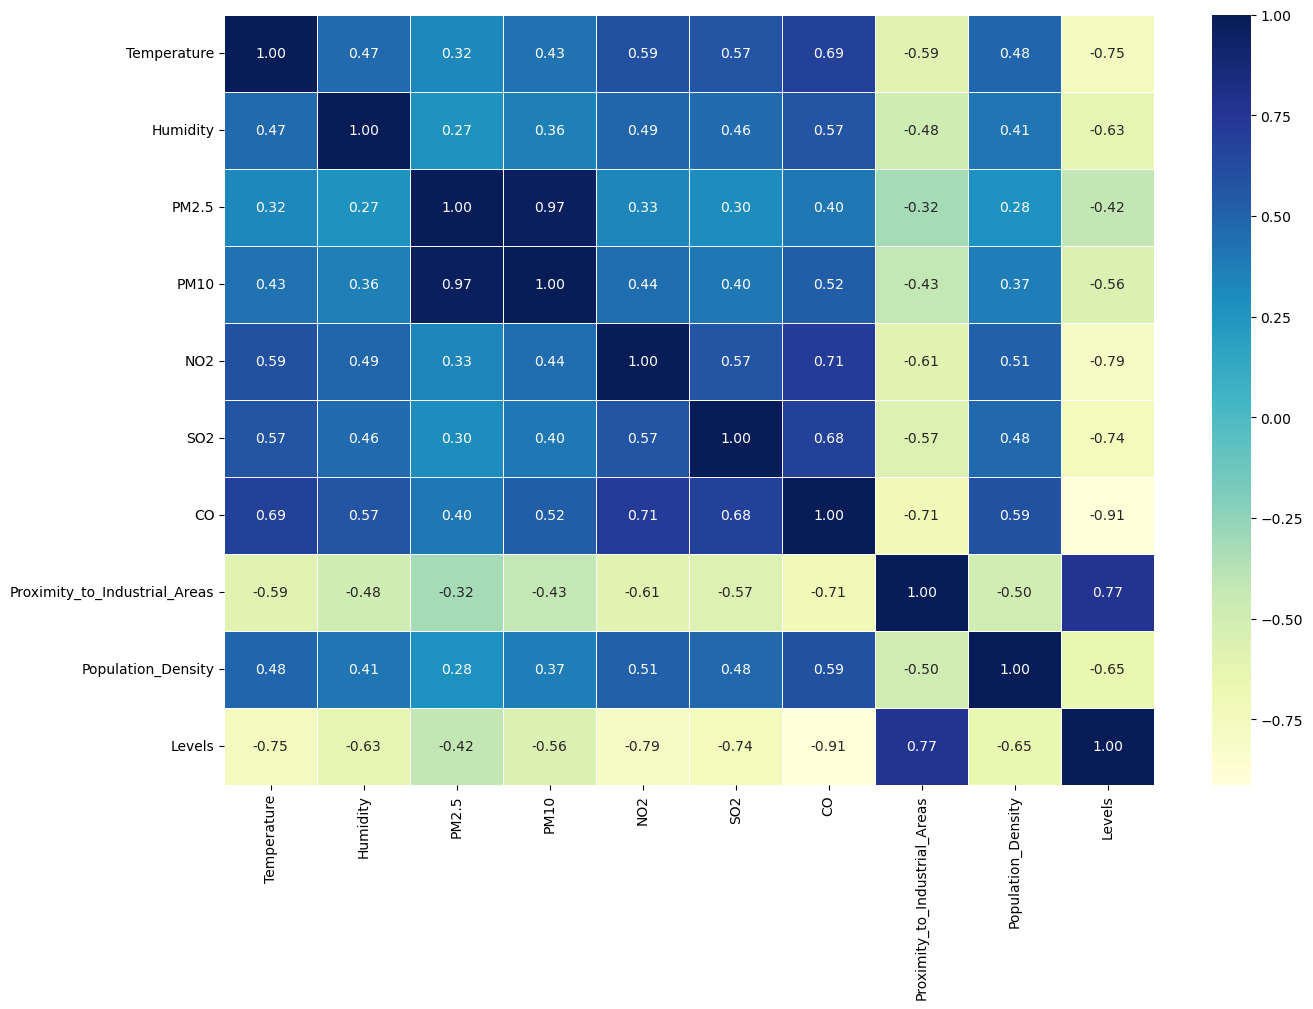

In [18]:
cor_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cor_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [19]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Levels
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,3
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,3


In [20]:
X=df.drop(labels="Levels",axis=1)
y=df.Levels.to_numpy()

In [21]:
X.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303


In [22]:
y,type(y)

(array([2, 2, 2, ..., 2, 3, 2], dtype=int64), numpy.ndarray)

In [23]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size = 0.2)

In [24]:
y_train, len(y_train)

(array([0, 3, 1, ..., 1, 3, 0], dtype=int64), 4000)

In [25]:
X_test.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
1501,31.3,73.4,72.8,88.8,54.1,17.1,2.54,2.6,755
2586,24.0,68.8,0.8,8.6,20.9,2.4,1.16,10.5,235
2653,25.4,78.6,4.1,6.7,21.3,9.1,1.40,10.1,543
1055,30.7,102.0,7.9,26.1,41.6,26.1,2.31,4.8,765
705,26.5,54.1,12.3,15.3,20.3,5.3,0.99,12.7,374


In [26]:
y_test, len(y_test)

(array([0, 3, 2, 0, 3, 0, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 3, 2, 1, 3, 3,
        1, 2, 3, 1, 3, 3, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 0, 3,
        3, 2, 2, 1, 3, 3, 2, 3, 3, 3, 3, 2, 0, 2, 1, 3, 3, 3, 3, 2, 3, 0,
        1, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 3, 2, 2, 0, 2,
        2, 1, 2, 3, 3, 1, 1, 2, 2, 3, 1, 3, 0, 2, 1, 2, 0, 3, 3, 3, 2, 3,
        2, 2, 2, 3, 2, 1, 0, 3, 3, 3, 2, 1, 1, 2, 1, 3, 2, 2, 3, 3, 2, 3,
        1, 3, 2, 2, 3, 3, 2, 3, 3, 1, 3, 3, 2, 2, 0, 3, 2, 2, 1, 1, 1, 3,
        3, 1, 2, 2, 2, 2, 0, 3, 2, 0, 1, 1, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3,
        3, 2, 3, 1, 1, 3, 2, 3, 3, 1, 3, 3, 3, 3, 0, 0, 2, 0, 2, 2, 0, 0,
        1, 1, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 2, 2, 2, 1, 3, 0,
        3, 2, 3, 2, 3, 2, 0, 0, 2, 3, 3, 3, 3, 3, 3, 0, 3, 1, 1, 2, 2, 3,
        2, 0, 3, 2, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 3, 0, 1, 3, 2, 3, 0,
        3, 2, 1, 1, 2, 3, 2, 2, 2, 3, 0, 0, 2, 3, 1, 3, 0, 3, 3, 1, 2, 3,
        1, 2, 3, 2, 2, 0, 3, 3, 2, 2, 

In [27]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=100), # Note: if you see a warning about "convergence not reached", you can increase `max_iter` until convergence is reached
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\rajpu\Desktop\Pollution_Level\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.786, 'Logistic Regression': 0.753, 'Random Forest': 0.961}

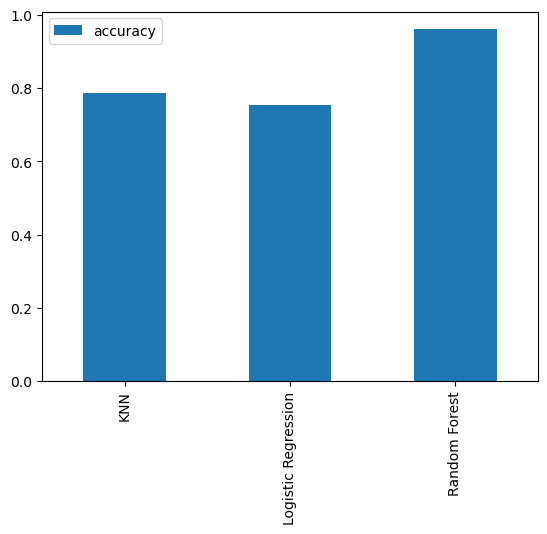

In [29]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();


In [30]:
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 101) # 1 to 50

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [31]:
train_scores

[1.0,
 0.92425,
 0.89925,
 0.89225,
 0.868,
 0.87225,
 0.86125,
 0.86275,
 0.85225,
 0.8515,
 0.84125,
 0.84175,
 0.834,
 0.8355,
 0.8225,
 0.82575,
 0.8155,
 0.81675,
 0.81225,
 0.811,
 0.8085,
 0.80725,
 0.8035,
 0.80175,
 0.79975,
 0.80025,
 0.79675,
 0.797,
 0.7905,
 0.78875,
 0.78725,
 0.7875,
 0.78175,
 0.785,
 0.782,
 0.77875,
 0.77775,
 0.77625,
 0.776,
 0.77575,
 0.77375,
 0.77375,
 0.77,
 0.77025,
 0.76975,
 0.767,
 0.765,
 0.7615,
 0.76025,
 0.75875,
 0.75625,
 0.75575,
 0.75625,
 0.75225,
 0.75125,
 0.75125,
 0.7495,
 0.74875,
 0.74675,
 0.74525,
 0.74525,
 0.74425,
 0.74225,
 0.742,
 0.7415,
 0.7405,
 0.73925,
 0.7385,
 0.73775,
 0.7365,
 0.73625,
 0.7355,
 0.735,
 0.7335,
 0.7335,
 0.733,
 0.734,
 0.73275,
 0.7315,
 0.72975,
 0.72775,
 0.728,
 0.728,
 0.72775,
 0.727,
 0.7255,
 0.72575,
 0.7245,
 0.7235,
 0.723,
 0.72225,
 0.72275,
 0.7205,
 0.717,
 0.7195,
 0.7175,
 0.7175,
 0.7155,
 0.7155,
 0.71275]

Maximum KNN score on the test data: 79.60%


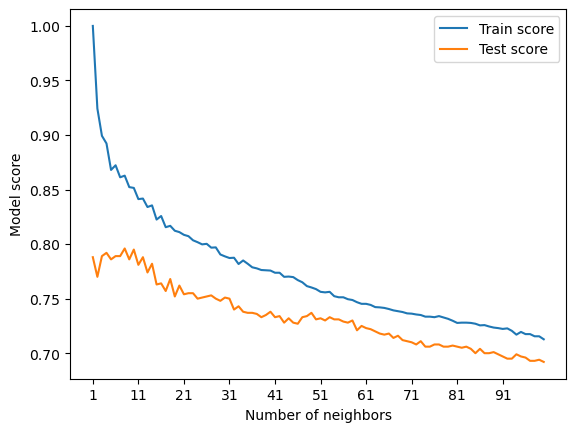

In [57]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 101, 10))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [33]:
le= LabelEncoder()
df['Levels']=le.fit_transform(df['Levels'])
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Levels
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,3
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,3
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,0
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,2
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,3


In [34]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2,random_state=42)

In [38]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 3, 2, 0, 3, 0, 3, 3, 3, 2, 1, 3, 0, 3, 2, 3, 3, 3, 2, 1, 3, 3,
       1, 2, 3, 1, 3, 3, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 0, 3,
       3, 2, 2, 1, 3, 3, 2, 3, 3, 3, 3, 2, 0, 2, 1, 3, 3, 3, 3, 2, 3, 1,
       1, 3, 2, 2, 3, 3, 1, 3, 3, 2, 2, 2, 3, 3, 3, 0, 1, 3, 2, 2, 0, 2,
       2, 0, 2, 3, 3, 1, 1, 2, 2, 3, 1, 3, 0, 2, 1, 2, 0, 3, 3, 3, 2, 3,
       2, 2, 2, 3, 2, 1, 0, 3, 3, 3, 2, 2, 2, 2, 1, 3, 2, 2, 3, 3, 2, 3,
       1, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 0, 3, 2, 2, 1, 1, 1, 3,
       3, 1, 2, 2, 2, 2, 0, 3, 2, 0, 1, 2, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3,
       3, 2, 3, 1, 1, 3, 2, 3, 3, 1, 3, 3, 3, 3, 0, 0, 2, 1, 2, 2, 0, 1,
       1, 1, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 3, 0,
       3, 2, 3, 2, 3, 2, 0, 0, 2, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 2, 2, 3,
       2, 0, 3, 2, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 3, 0, 1, 3, 2, 3, 0,
       3, 2, 1, 1, 2, 3, 2, 2, 2, 3, 1, 0, 2, 3, 1, 3, 0, 3, 3, 1, 2, 3,
       1, 2, 3, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 3, 2,

In [37]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [39]:
cr = classification_report(y_test,y_pred)
print("classification report:")
print(cr)

classification report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       111
           1       0.84      0.89      0.86       186
           2       0.96      0.96      0.96       294
           3       1.00      1.00      1.00       409

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



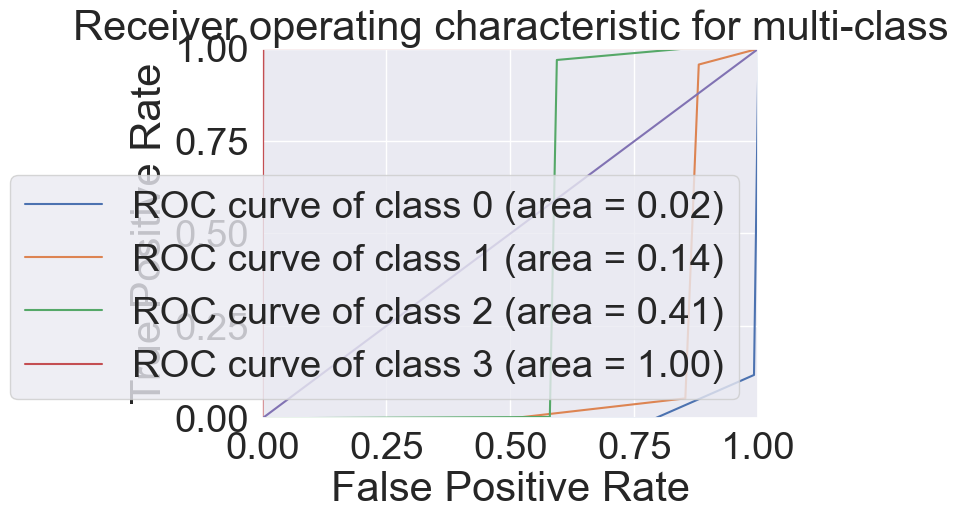

In [76]:
from sklearn.metrics import RocCurveDisplay 
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Assuming y_test are your true labels and y_score are the predicted scores
# y_test = ...
# y_score = ...
classes = [0, 1, 2, 3]  # Example class labels

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=classes)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], '')
plt.xlim([0.00, 1.00])
plt.ylim([0.00, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc='lower right')
plt.show()


#RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                              # X=X_test, 
                               #y=y_test); 

In [45]:
accuracy_score(y_test,y_pred)

0.948

In [47]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [52]:
y_pred = rf.predict(X_test)

In [53]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       106
           1       0.90      0.88      0.89       190
           2       0.97      0.97      0.97       294
           3       1.00      1.00      1.00       410

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



In [54]:
accuracy_score(y_test,y_pred)

0.959

In [78]:
logreg.score(X_test, y_test)

0.948

In [59]:
print(confusion_matrix(y_test, y_pred))

[[ 98  13   0   0]
 [  8 168  10   0]
 [  0   9 284   1]
 [  0   0   0 409]]


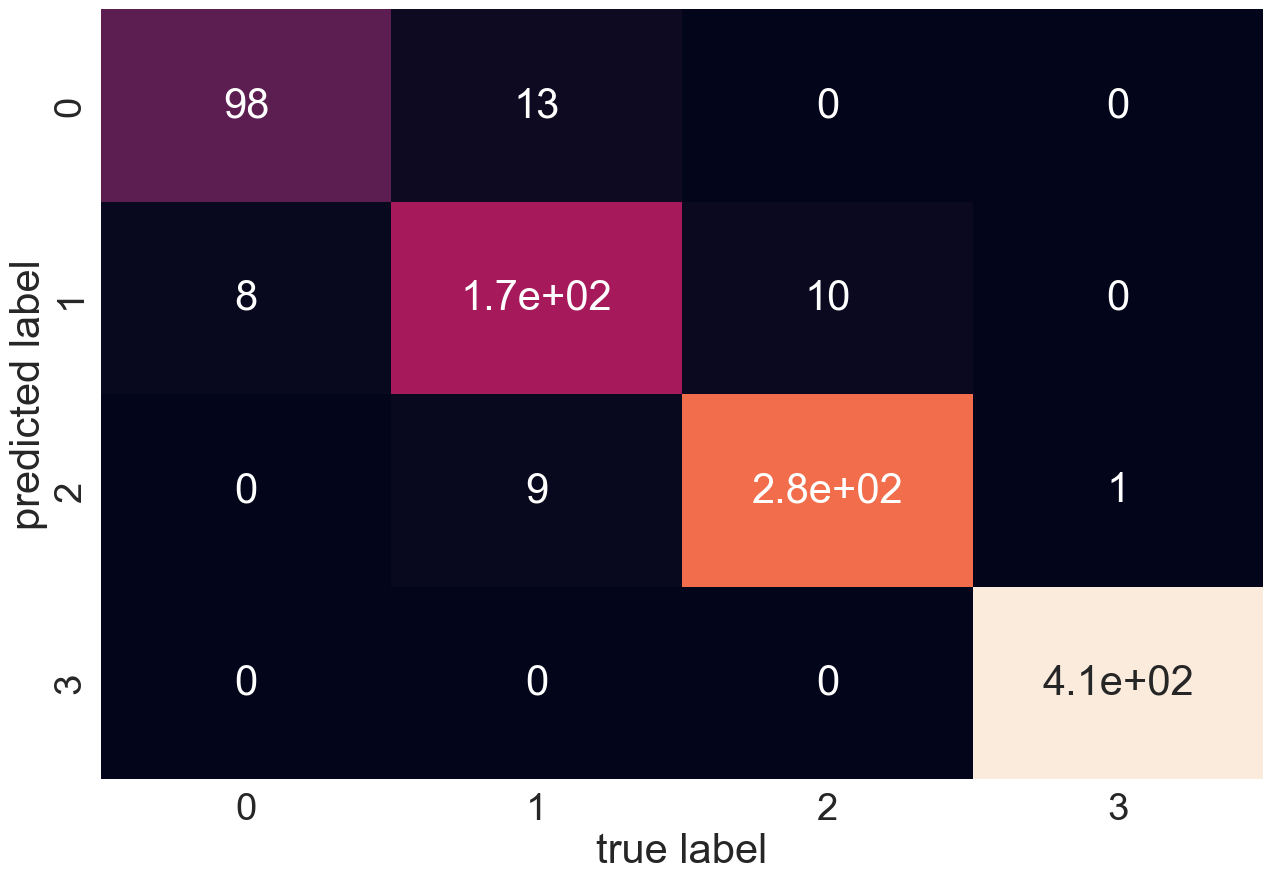

In [61]:
import seaborn as sns
sns.set(font_scale=2.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       111
           1       0.88      0.90      0.89       186
           2       0.97      0.97      0.97       294
           3       1.00      1.00      1.00       409

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



In [108]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Sample data
#X = np.random.rand(1000, 10)  # 1000 samples, 10 features
#y = np.random.randint(0, 4, 1000)  # 1000 samples, 4 classes

# Define the classifier
clf = LogisticRegression(max_iter=1000)

# Define scoring metrics
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation
scores = cross_validate(clf, X, y, cv=5, scoring=scoring,return_train_score=True)


# Print the results
print(f"Precision: {np.mean(scores['test_precision']):.3f}")
print(f"Recall: { np.mean(scores['test_recall']):.3f}")
print(f"F1-score: { np.mean(scores['test_f1']):.3f}")


C:\Users\rajpu\Desktop\Pollution_Level\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajpu\Desktop\Pollution_Level\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Precision: 0.841
Recall: 0.845
F1-score: 0.842


C:\Users\rajpu\Desktop\Pollution_Level\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [89]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.846, 0.864, 0.87 , 0.847, 0.858])

In [67]:
cv_acc = np.mean(cv_acc)
cv_acc

0.857

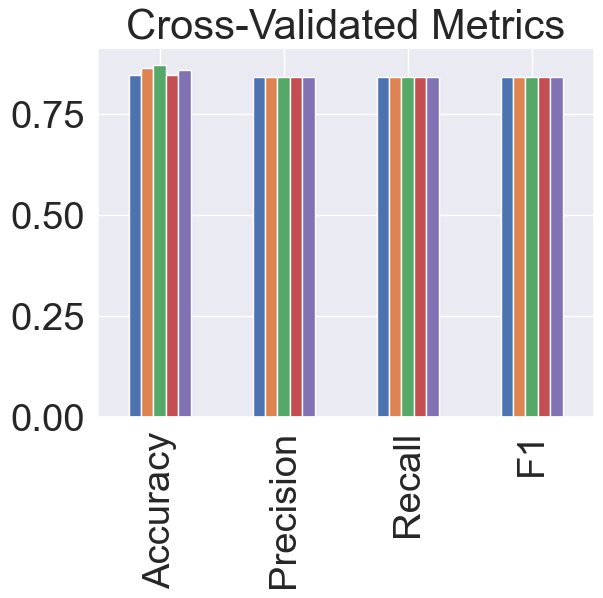

In [121]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision":  np.mean(scores['test_precision']),
                            "Recall":  np.mean(scores['test_precision']),
                            "F1":  np.mean(scores['test_precision'])})
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

Precision: 0.841
0.845
F1-score: 0.842


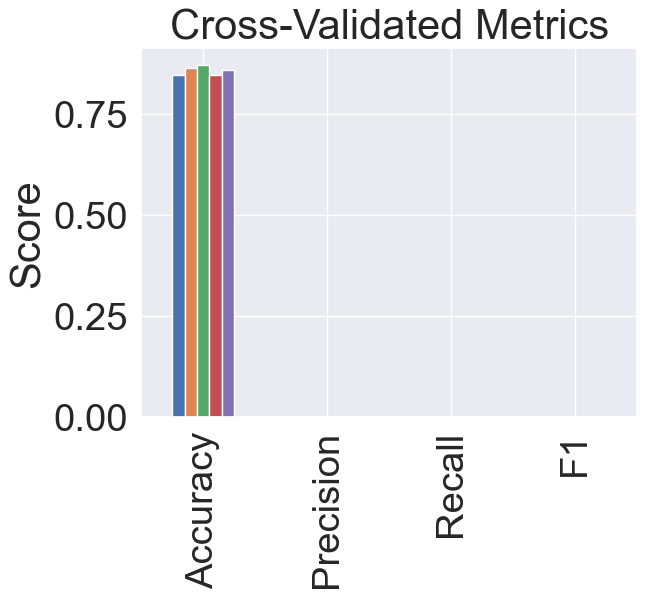

In [120]:
cv_metrics = pd.DataFrame({ "Accuracy": cv_acc,
                           "Precision": print(f"Precision: {np.mean(scores['test_precision']):.3f}"),
                           "Recall": print(f"{np.mean(scores['test_recall']):.3f}"),
                           "F1": print(f"F1-score: { np.mean(scores['test_f1']):.3f}")})
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False) 
plt.ylabel('Score')
plt.show()

In [72]:
clf.fit(X_train, y_train);


In [73]:
clf.coef_


array([[ 0.6026067 ,  0.43561668, -0.66259848,  0.84158679,  0.8199487 ,
         0.47095513,  1.34920028, -0.18314181,  0.64177936],
       [ 0.04058514,  0.15957522, -0.61428049,  0.66521475,  0.09947965,
         0.10731686,  0.39052685, -0.84237064,  0.07498275],
       [-0.18160866, -0.09792773,  0.48687579, -0.59668931, -0.31515931,
        -0.22589133, -0.64800864, -1.95611469, -0.13338388],
       [-1.1260001 , -0.43294891,  0.35842501, -1.02924881, -1.21534721,
        -1.19510628, -3.4164237 ,  2.00871324, -0.52862204]])

In [74]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict


{'Temperature': 0.602606699646424,
 'Humidity': 0.43561668073502674,
 'PM2.5': -0.6625984828253901,
 'PM10': 0.8415867850836823,
 'NO2': 0.819948697282412,
 'SO2': 0.4709551297679824,
 'CO': 1.349200280566448,
 'Proximity_to_Industrial_Areas': -0.18314180718231202,
 'Population_Density': 0.6417793585615389}

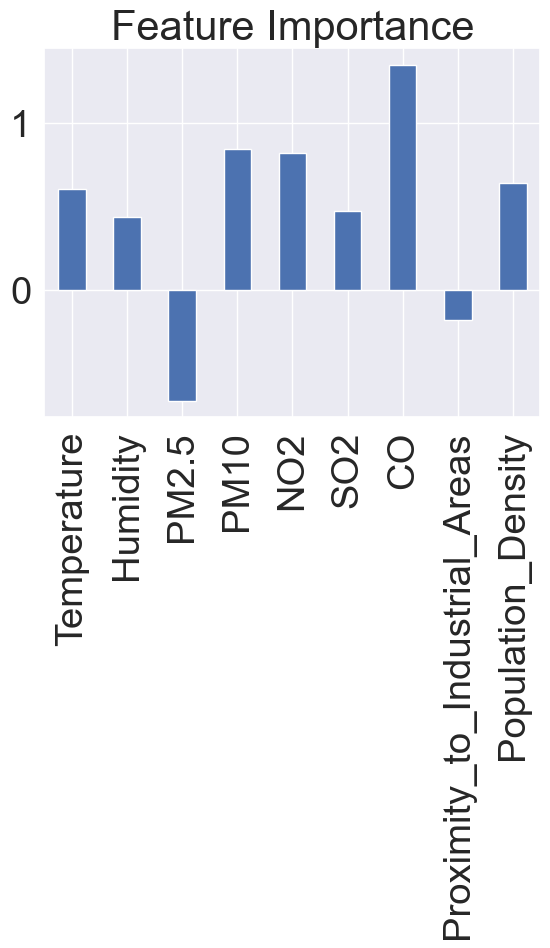

In [75]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [148]:
newdata = pd.DataFrame({"Temperature":[6,2,19],
                        "Humidity":[29,47,80],
                       "PM2.5":[2.3,5.5,11.9],
                       "PM10":[19,5.6,8.2],
                       "NO2":[1.9,6.3,2.3],"SO2":[2.8,4.9,1.7],"CO":[0.08,0.02,0.58],
                       "Proximity_to_Industrial_Areas":[11.7,4.2,7.2],"Population_Density":[100,306,450]})
newdata

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,6,29,2.3,19.0,1.9,2.8,0.08,11.7,100
1,2,47,5.5,5.6,6.3,4.9,0.02,4.2,306
2,19,80,11.9,8.2,2.3,1.7,0.58,7.2,450


In [149]:
newdata_scaled = scaler.fit_transform(newdata)

In [150]:
new_pred = logreg.predict(newdata_scaled)
new_pred

array([3, 2, 2], dtype=int64)

In [151]:
new_pred = le.inverse_transform(new_pred)
new_pred

array([3, 2, 2], dtype=int64)

In [152]:
newdata["Levels"]= new_pred
newdata

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Levels
0,6,29,2.3,19.0,1.9,2.8,0.08,11.7,100,3
1,2,47,5.5,5.6,6.3,4.9,0.02,4.2,306,2
2,19,80,11.9,8.2,2.3,1.7,0.58,7.2,450,2
